# T1 - 3 - Data Cleaning - Plots

In [48]:
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

mainpath = '/workspaces/machine-learning-course/data/python-ml-course/datasets'
folder = '/customer-churn-model'

data = pd.read_csv(mainpath + folder + '/Customer Churn Model.txt')

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [16]:
%matplotlib inline

In [6]:
#savefig("/workspaces/machine-learning-course/data/figs")

## Scatter Plot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

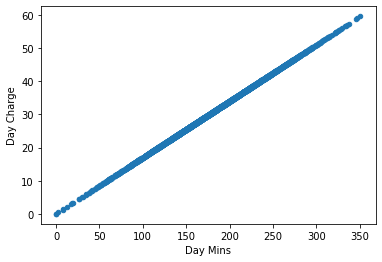

In [17]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

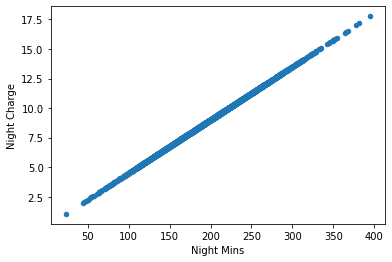

In [19]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

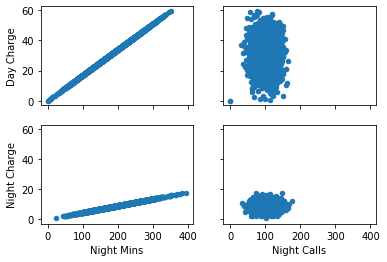

In [32]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

## Histogramas de frecuencia

In [57]:
sturges_rule_bins = 1 + math.log(len(data), 2)
sturges_rule_bins = round(sturges_rule_bins)
sturges_rule_bins

13

Text(0.5, 1.0, 'Hisograma de número de llamadas al día')

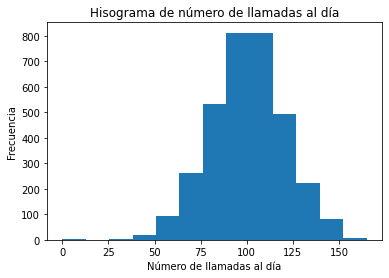

In [58]:
plt.hist(data["Day Calls"], bins = sturges_rule_bins)
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Hisograma de número de llamadas al día")

## Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

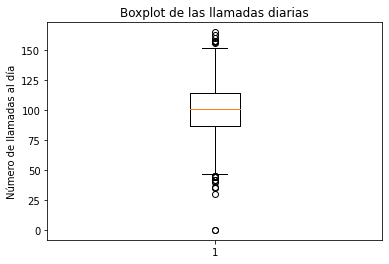

In [62]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas al día")
plt.title("Boxplot de las llamadas diarias")

In [67]:
data["Day Calls"].mode()

0    102
dtype: int64

In [68]:
data["Day Calls"].mean()

100.43564356435644

In [69]:
data["Day Calls"].median()

101.0

In [70]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

### Bigotes

In [75]:
IQR=data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)
IQR

27.0

In [76]:
data["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

In [80]:
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5

{'whiskers': [<matplotlib.lines.Line2D at 0x7f953b8cc810>,
 'caps': [<matplotlib.lines.Line2D at 0x7f953b8cf510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f953b8cc410>,
 'medians': [<matplotlib.lines.Line2D at 0x7f953b8cfed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f953b8f5610>,
 'means': []}

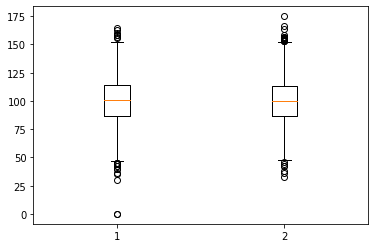

In [90]:
plt.boxplot(data[["Day Calls", "Night Calls"]])